# Image Histograms

These are an incredibly valuable image analysis tool for computer vision as they help us understand the distribution of data associated with an image.
The most common example being to show the range of intensity values.

In this notebook we will demostrate how to create histograms first from grayscale images and then color images, we will then explain how to understand and interpret these plots.

## What Histograms Actually are?

In escence they are collected counts of data organized into bins of predefined width. We specify the number of bins along the **x-axis** to use where a single bin represents a range of values. This is most commonly pixel intensities.

A single bin could be from the range 0 to 9 or 10 to 19 and so on representing the values of pixel intensities from 0 to 255.

Conversely along the **y-axis** we get the count of the number of pixels that match a given bin.

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["image.cmap"] = "gray"

The histogram function comes with the matplotlib library the arguments are:

1. **x**: Array or sequence of (n) arrays.
2. **bins**: Defines the number of equal-width bins in the range. This is an optional argument with a default value of 10.
3. **range**: The lower and upper range of the bins, where lower and upper outliers are ignored. This is an optional argument with a default value of **None**, equivalent to using the whole range of the input **x**.

It's also worth noting that if we didn't specify the range the histogram function would have no concept of what the maximum value should be, which is why we have to specify it explicitly.

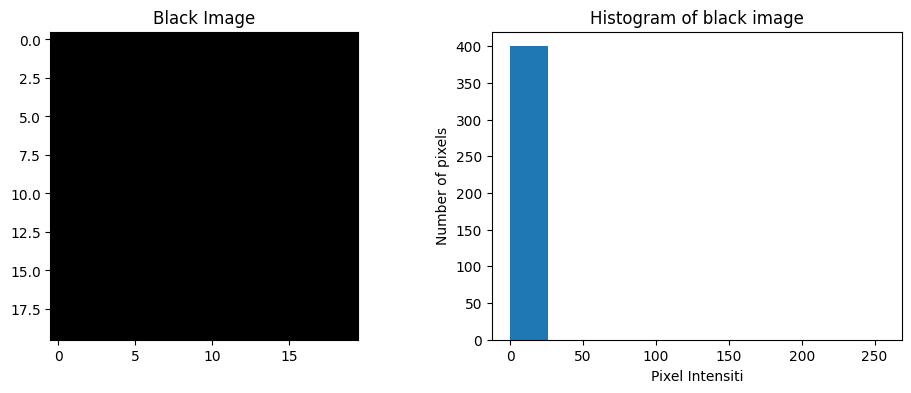

In [14]:
# Create a numpy array 20X20X1 filled with zero values, equivalent to the grayscale image.
black_img = np.zeros((20, 20, 1))

# Flatten the image data into a single 1D array.
black_flatten = black_img.ravel()

# Display the image and histograms.
plt.figure(figsize=(18, 4))

plt.subplot(131); plt.imshow(black_img); plt.title("Black Image")

plt.subplot(132)
plt.hist(black_flatten, range=[0, 256])
plt.xlabel("Pixel Intensiti")
plt.ylabel("Number of pixels")
plt.title("Histogram of black image");

### Create a histogram from a binary image

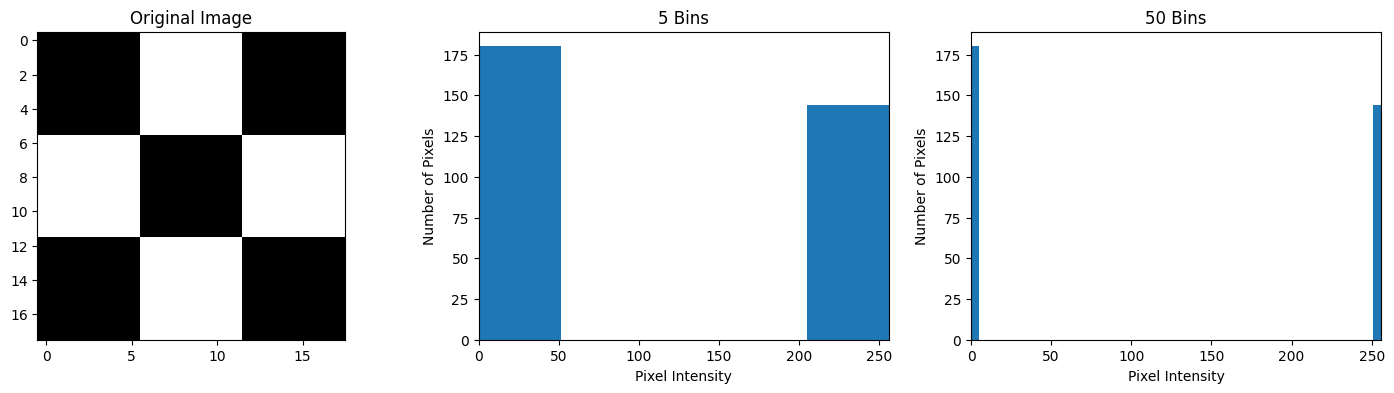

In [15]:
# Read the image.
img = cv2.imread("./checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D array.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=(18, 4))

plt.subplot(131); plt.imshow(img); plt.title("Original Image")

plt.subplot(132)
plt.hist(img_flatten, 5, range=[0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("5 Bins")

plt.subplot(133)
plt.hist(img_flatten, 50, [0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("50 Bins");

What this example also illustrates is the importance and use of specifying your bin width and how it actually affects your chart.

In these cases, even though we have five bins in one histogram and fifty in the other the actual heights are exactly the same because the pixels all fell into the first and last bins respectivly for black and white.

In our five bin histogram the first bin represents ranges 0 to 51 whereas in the fifty bin histogram the range is 0 to 5.1

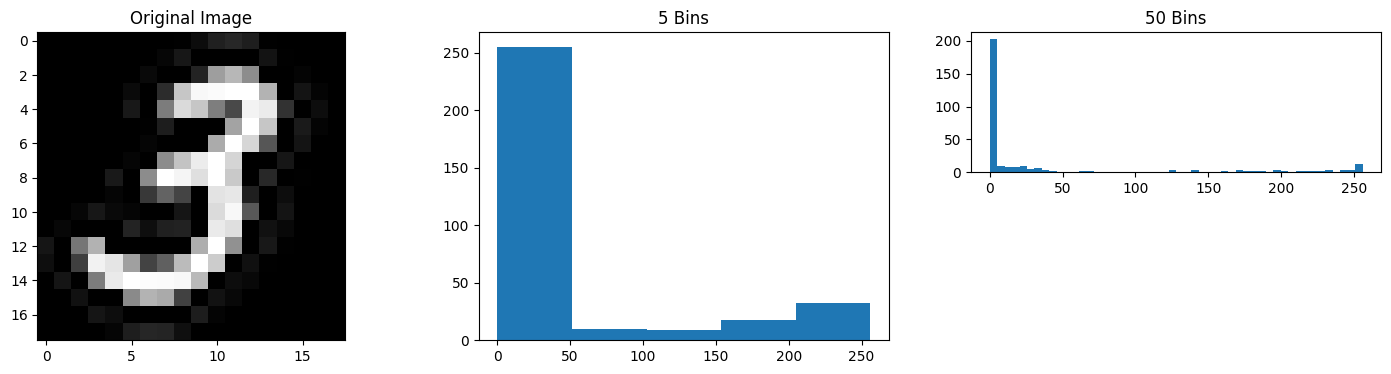

In [16]:
# Read the image.
img = cv2.imread("./MNIST_3_18x18.png", cv2.IMREAD_GRAYSCALE)
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=(18, 4))

plt.subplot(131); plt.imshow(img); plt.title("Original Image")
plt.subplot(132); plt.hist(img_flatten, 5, [0, 256]); plt.title("5 Bins")
plt.subplot(233);plt.hist(img_flatten, 50, [0, 256]); plt.title("50 Bins");

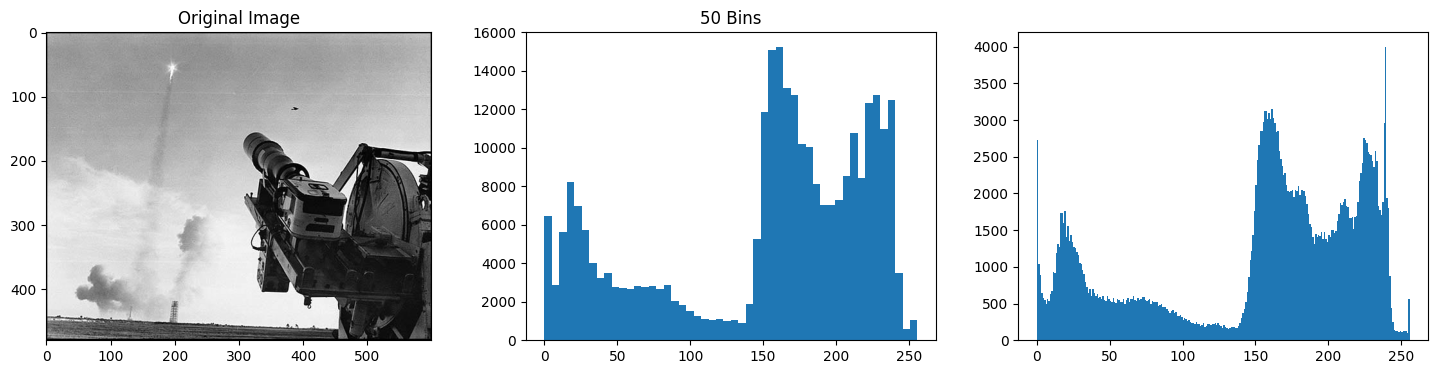

In [17]:
# Read the image and flatten it.
img = cv2.imread("./Apollo-8-Launch.jpg", cv2.IMREAD_GRAYSCALE)
img_flatten = img.ravel()

# Display the image and histograms
plt.figure(figsize=(18, 4))
plt.subplot(131); plt.imshow(img); plt.title("Original Image")
plt.subplot(132); plt.hist(img_flatten, 50, [0, 256]); plt.title("50 Bins")
plt.subplot(133); plt.hist(img_flatten, 256, [0, 256]);

Until now we've been using the matplotlib version of histogram plotting, but there is also an opencv function that has some additional power features that can be very helpful for **image analysis** and that is the **calcHist** function.

1. images
2. channels
3. mask
4. histSize
5. ranges

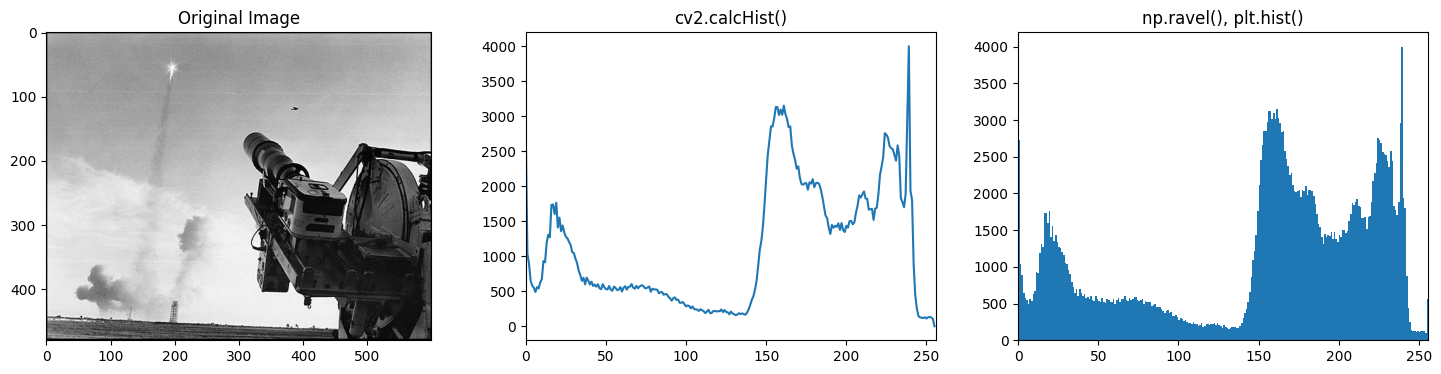

In [18]:
# Read the image.
image = cv2.imread("./Apollo-8-Launch.jpg", cv2.IMREAD_GRAYSCALE)

# Use calcHist() in OpenCV.
hist = cv2.calcHist(images=[image], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

# Flatten the image data.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize=(18, 4))
plt.subplot(131); plt.imshow(image); plt.title("Original Image")
plt.subplot(132); plt.plot(hist); plt.xlim([0, 256]); plt.title("cv2.calcHist()");
plt.subplot(133); plt.hist(img_flatten, 256, [0, 256]); plt.xlim([0, 256]); plt.title("np.ravel(), plt.hist()");

One more note before we move on to color histograms it's also important to understand the limitations or really what we can or cannot infer from histograms.

Both  images have exactly the same histogram even though these are wildly different images they can have the same shape in terms of their histogram and so it's important to not make erroneous assumptions about your image processing or even tying to identify two identical images based on histogram alone.

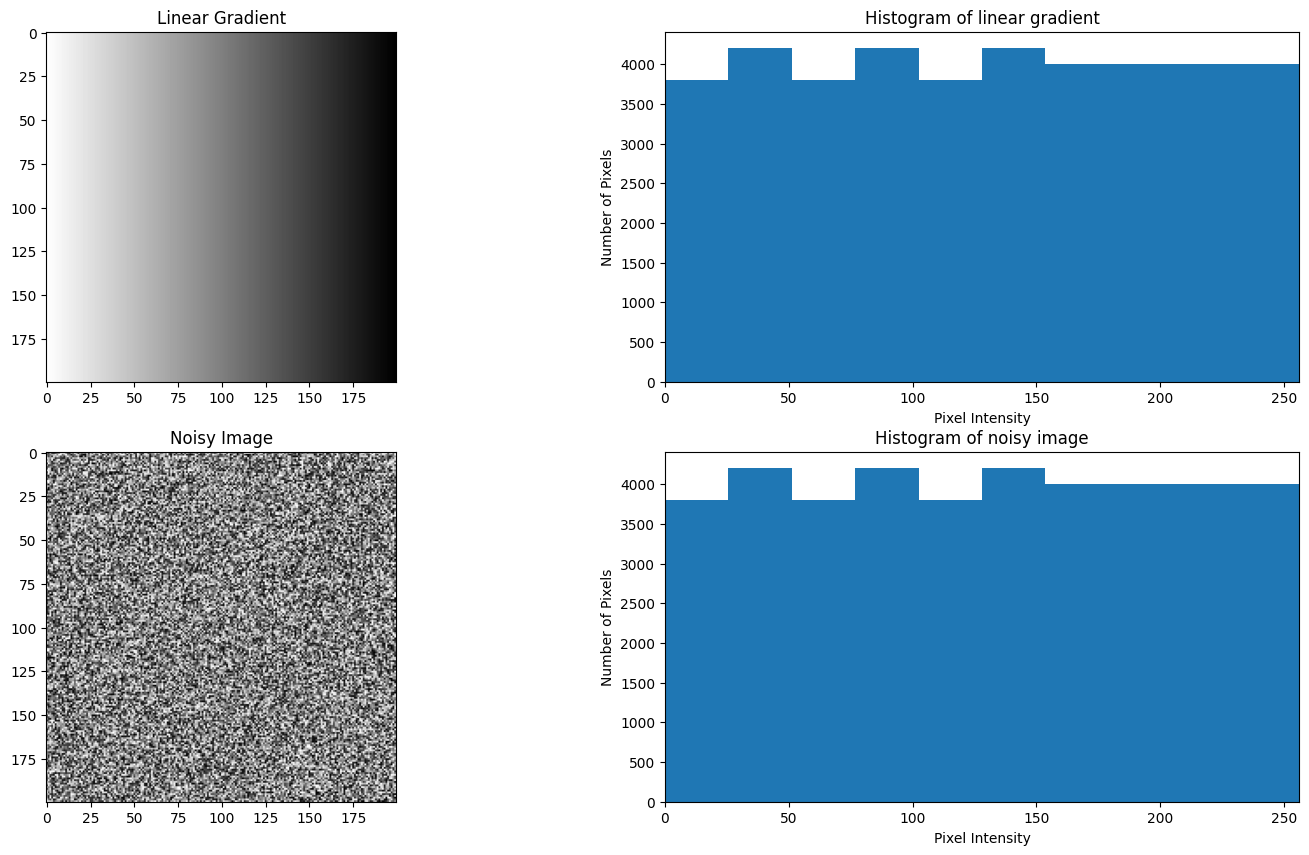

In [19]:
# Load the two gradient images.
img_gradient = cv2.imread("./linear_graident.png", cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread("./noisy.png", cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D arrays.
gradient_flatten = img_gradient.ravel()
noisy_flatten = img_noisy.ravel()

# Display the images and histograms.
plt.figure(figsize=(18, 10))

plt.subplot(221); plt.imshow(img_gradient); plt.title("Linear Gradient")

plt.subplot(222)
plt.hist(gradient_flatten, range=[0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of linear gradient")

plt.subplot(223); plt.imshow(img_noisy); plt.title("Noisy Image")

plt.subplot(224)
plt.hist(noisy_flatten, range=[0, 256])
plt.xlim([0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of noisy image");

# Color Histograms

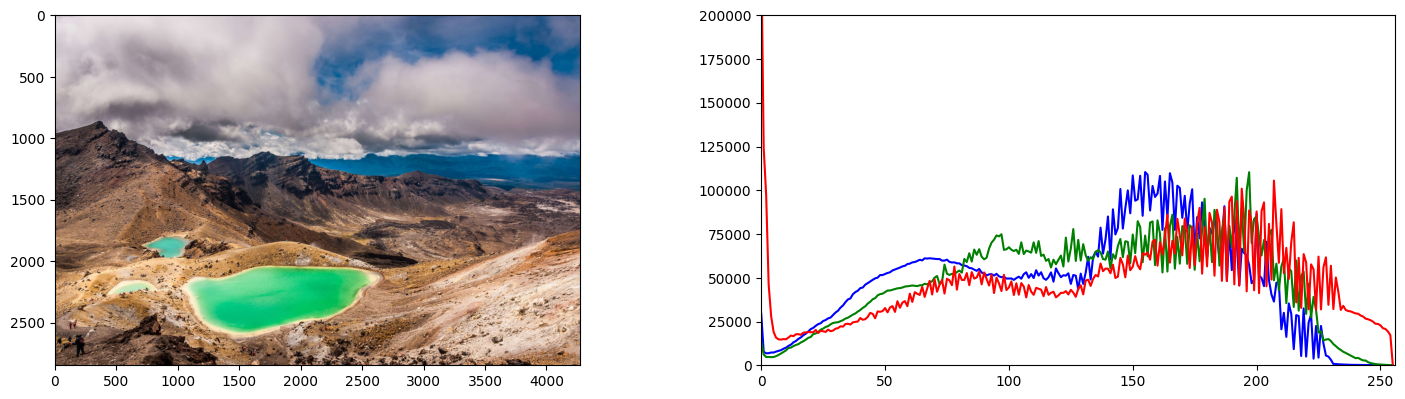

In [20]:
img = cv2.imread("./Emerald_Lakes_New_Zealand.jpg")

hist1 = cv2.calcHist([img], [0], None, [256], [0, 255])  # B
hist2 = cv2.calcHist([img], [1], None, [256], [0, 255])  # G
hist3 = cv2.calcHist([img], [2], None, [256], [0, 255])  # R

plt.figure(figsize=(18, 10))
plt.subplot(221); plt.imshow(img[:, :, ::-1])

plt.subplot(222)
plt.plot(hist1, 'b'); plt.plot(hist2, 'g'); plt.plot(hist3, 'r')
plt.xlim([0, 256])
plt.ylim([0, 200000]);

### Using a mask with calcHist()

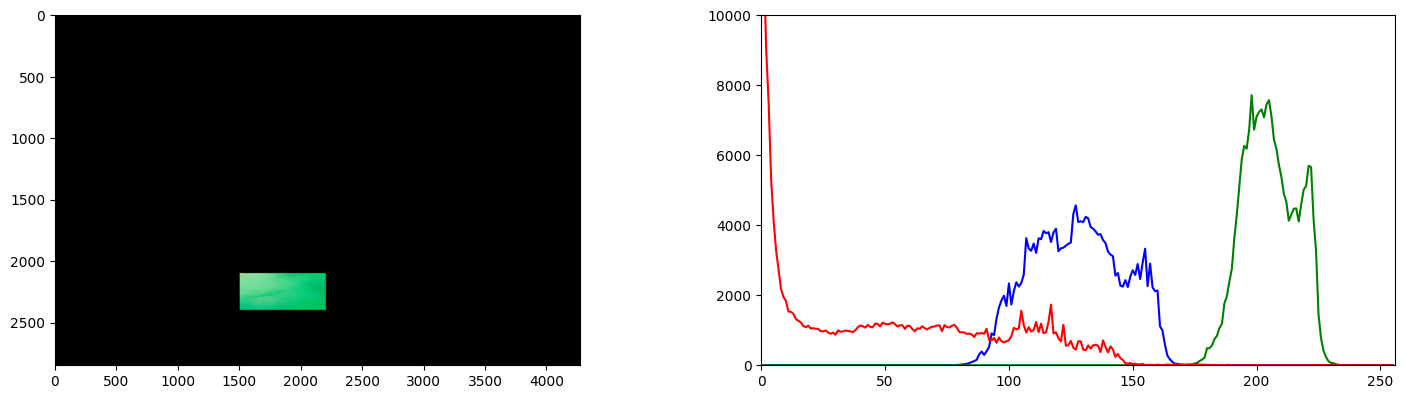

In [21]:
# Read the color images.
img = cv2.imread("./Emerald_Lakes_New_Zealand.jpg")

# Create a mask to filter the image for the histogram calculation.
mask_hist = np.zeros((img.shape[0], img.shape[1]), dtype='uint8')

# Select a region that isolates the green lake.
mask_hist[2100:2400, 1500:2200] = 255

# Create a similar mask to show the selected region in the image (for display purposes only).
# The mask must have the same number of color channels as the image, but each color channel will
# contain the same information.
mat = [mask_hist, mask_hist, mask_hist]
mask_3ch = cv2.merge(mat, 3)

# Create an image that only shows the selected region of interest.
img_roi = cv2.bitwise_and(img, mask_3ch)

# Compute histograms for each color channel for both images.
hist1_lake = cv2.calcHist([img], [0], mask_hist, [256], [0, 255])
hist2_lake = cv2.calcHist([img], [1], mask_hist, [256], [0, 255])
hist3_lake = cv2.calcHist([img], [2], mask_hist, [256], [0, 255])

# Display the images and histogram plots.
plt.figure(figsize=(18, 10))
plt.subplot(223); plt.imshow(img_roi[:, :, ::-1])

plt.subplot(224); plt.plot(hist1_lake, 'b'); plt.plot(hist2_lake, 'g'); plt.plot(hist3_lake, 'r');
plt.xlim([0, 256])
plt.ylim([0, 10000]);

# Histogram Equalization

Essentially what this is doing is taking a distribution of data and then reorganizing it to be an even spread

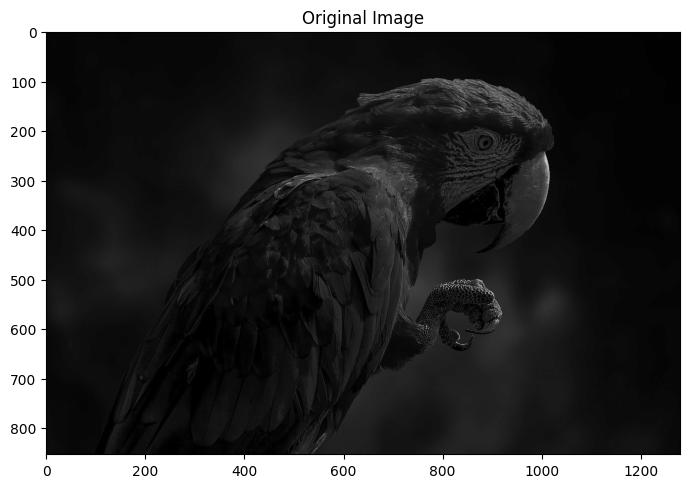

In [22]:
# Read the image in grayscale format.
img = cv2.imread("./parrot.jpg", cv2.IMREAD_GRAYSCALE)

# Display the image.
plt.figure(figsize=(18, 6))
plt.subplot(121); plt.imshow(img); plt.title("Original Image");

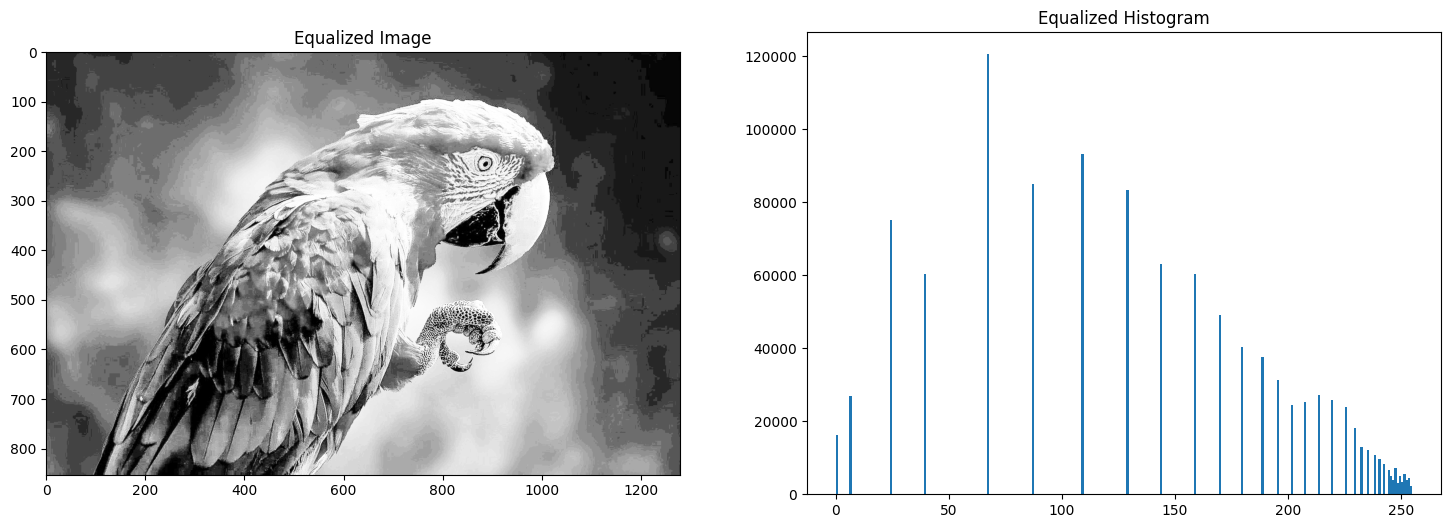

In [23]:
# Equalize histogram.
img_eq = cv2.equalizeHist(img)

# Display the images.
plt.figure(figsize=(18, 6))
plt.subplot(121); plt.imshow(img_eq); plt.title("Equalized Image")
plt.subplot(122); plt.hist(img_eq.ravel(), 256, [0, 255]); plt.title("Equalized Histogram");

# Histogram Equalization for Color Images

There are new colors that were invented that weren't created before. This is because we've normalized each of the color channels independently, but a color is really represented by the mixture of RGB together

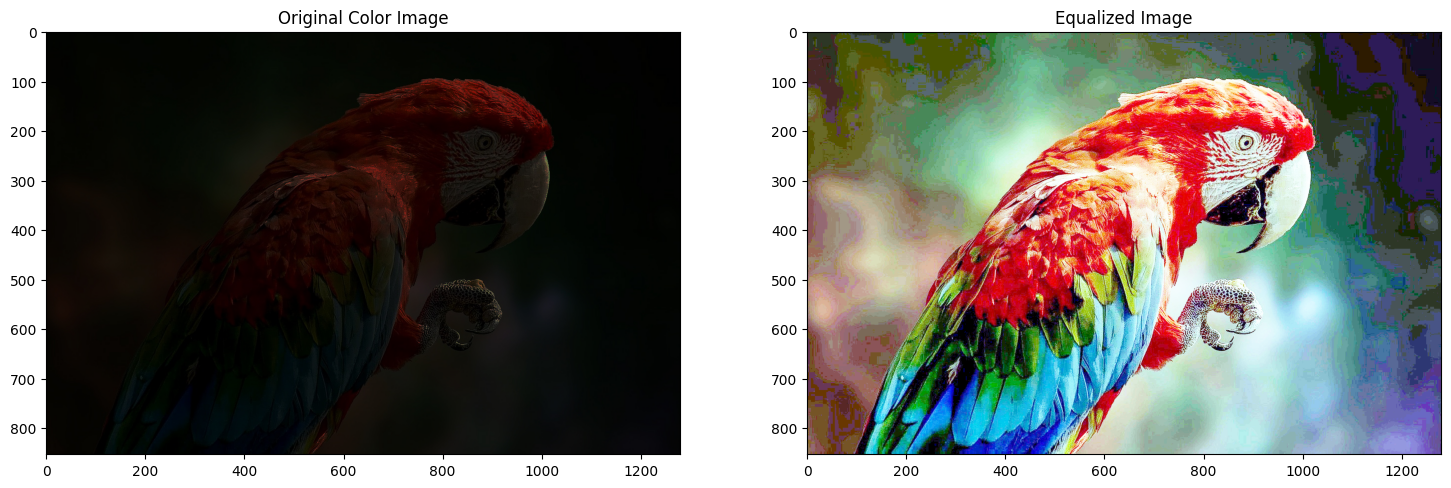

In [24]:
img = cv2.imread("./parrot.jpg")
img_eq = np.zeros_like(img)

# Perform histograms equalization on each channel separately.
for i in range(3):
    img_eq[:, :, i] = cv2.equalizeHist(img[:, :, i])

# Display the images.
plt.figure(figsize=(18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title("Original Color Image");
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title("Equalized Image");